In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.ticker import FuncFormatter
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import jax

import icomo


sys.path.append("../src/")
from tapm import model_HIVandSTI as model
from tapm import sti_infection_results_LambdaP
from tapm import utils

In [2]:
args, y0 = utils.read_params(filename="model_params_HIVandSTI.txt")
integrator = model.setup_model(args, y0)

INFO:tapm.HIVandSTI.model_HIVandSTI:Model setup complete and ready for simulation


In [3]:
# Define the time dependent PrEP supply (between 0 and 1)
ts = np.linspace(0, 3600 * 5, 3600)
prep_supply = 1 - ((ts > 20 * 360) * (ts < 21 * 360))

In [4]:
output = integrator(y0=y0, constant_args=args, arg_t=prep_supply)

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
INFO:tapm.HIVandSTI.model_HIVandSTI:Using exponential function to calculate m
INFO:tapm.HIVandSTI.model_HIVandSTI:Parameters: min_exp = 0.0, max_exp = 1.0, tau_exp = 0.2


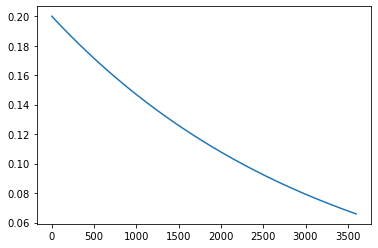

In [5]:
plt.plot(output["P_HIV"])

In [6]:
output

{'E_HIV': Array([0.00000000e+00, 2.96347747e-05, 3.16177536e-05, ...,
        1.14400378e-07, 1.14367844e-07, 1.14335319e-07],      dtype=float64, weak_type=True),
 'H': Array([0.        , 0.00029893, 0.00070316, ..., 0.00559747, 0.00559804,
        0.00559861], dtype=float64, weak_type=True),
 'I_HIV': Array([1.00000000e-02, 1.79066092e-03, 3.25569907e-04, ...,
        1.70893248e-06, 1.70841206e-06, 1.70789180e-06],      dtype=float64, weak_type=True),
 'Ia_STI': Array([9.00000000e-003, 6.44814915e-003, 4.61970498e-003, ...,
        2.15502490e-307, 2.15502490e-307, 2.15502490e-307],      dtype=float64, weak_type=True),
 'Is_STI': Array([1.00000000e-003, 7.39478042e-004, 5.45871903e-004, ...,
        2.11777156e-307, 2.11777156e-307, 2.11777156e-307],      dtype=float64, weak_type=True),
 'P_HIV': Array([0.2       , 0.19993826, 0.19987655, ..., 0.06587926, 0.06585893,
        0.0658386 ], dtype=float64, weak_type=True),
 'S_HIV': Array([0.79      , 0.79003279, 0.79009185, ..., 0.9307

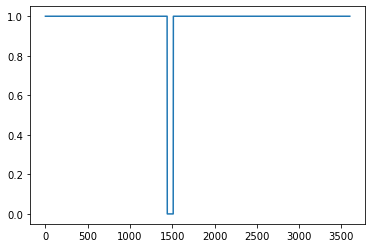

In [7]:
plt.plot(prep_supply)